In [ ]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=f16202014c7135ad323c29c987c43f9f71e0a2b4398e705958c3509b05f1439e
  Stored in directory: /root/.cache/pip/wheels/21/2d/19/8b5488f0caea6d892333413745640532d40d70e6b5351d7633
Successfully built pyforest


In [ ]:
from pyforest import*

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fuel_Consumption_2000-2022.csv to Fuel_Consumption_2000-2022.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Fuel_Consumption_2000-2022.csv']))

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [ ]:
df.shape

(22556, 13)

In [ ]:
df.isna().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [ ]:
df.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [ ]:
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
least_fuel_efficient_brands = df.groupby('MAKE')['FUEL CONSUMPTION'].mean().sort_values(ascending = False)

In [ ]:
least_fuel_efficient_brands.head(10)

MAKE
Bugatti        28.011111
BUGATTI        26.566667
FERRARI        21.683562
Lamborghini    21.554348
LAMBORGHINI    20.610769
BENTLEY        20.193023
Rolls-Royce    20.057143
ROLLS-ROYCE    18.879687
Bentley        18.321875
SRT            18.100000
Name: FUEL CONSUMPTION, dtype: float64

In [ ]:
top_fuel_efficient_brands = df.groupby('MAKE')['FUEL CONSUMPTION'].mean().sort_values()



In [ ]:
top_fuel_efficient_brands.head(10)

MAKE
SMART         5.972727
SCION         8.797727
MINI          8.820690
FIAT          8.842353
Honda         8.865385
Mitsubishi    9.059524
Hyundai       9.168667
Mazda         9.339695
Kia           9.451562
HONDA         9.580494
Name: FUEL CONSUMPTION, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

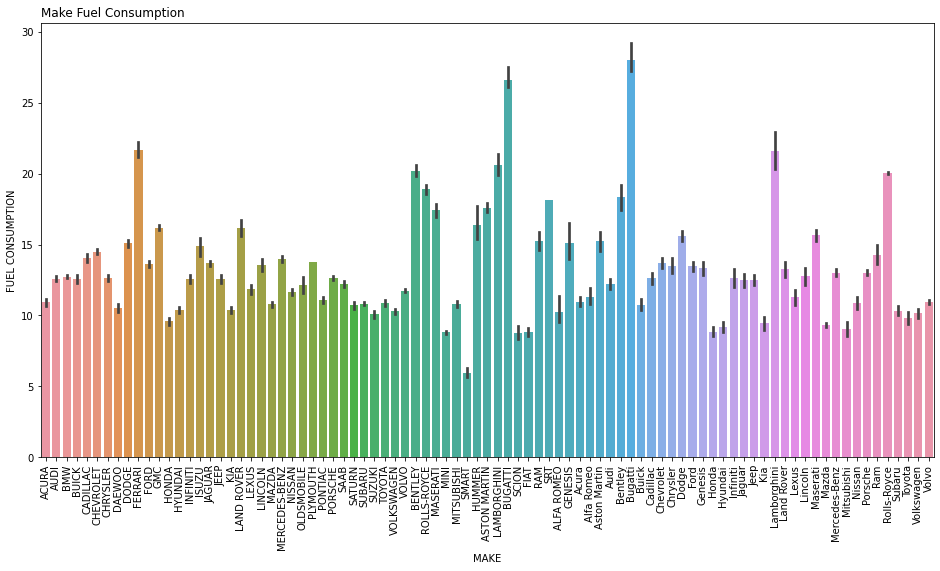

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(data=df,y='FUEL CONSUMPTION',x='MAKE')
plt.xticks(rotation=90)
plt.title("Make Fuel Consumption", loc='left')
plt.show()

**Brand Popularity**

In [ ]:
df.MAKE.value_counts().head(10)

CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
DODGE             789
TOYOTA            759
PORSCHE           658
AUDI              609
NISSAN            608
Name: MAKE, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, 'ACURA'),
  Text(1, 0, 'AUDI'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'BUICK'),
  Text(4, 0, 'CADILLAC'),
  Text(5, 0, 'CHEVROLET'),
  Text(6, 0, 'CHRYSLER'),
  Text(7, 0, 'DAEWOO'),
  Text(8, 0, 'DODGE'),
  Text(9, 0, 'FERRARI'),
  Text(10, 0, 'FORD'),
  Text(11, 0, 'GMC'),
  Text(12, 0, 'HONDA'),
  Text(13, 0, 'HYUNDAI'),
  Text(14, 0, 'INFINITI'),
  Text(15, 0, 'ISUZU'),
  Text(16, 0, 'JAGUAR'),
  Text(17, 0, 'JEEP'),
  Text(18, 0, 'KIA'),
  Text(19, 0, 'LAND ROVER'),
  Text(20, 0, 'LEXUS'),
  Text(21, 0, 'LINCOLN'),
  Text(22, 0, 'MAZDA'),
  Text(23, 0, 'MERCEDES-BENZ'),
  Text(24, 

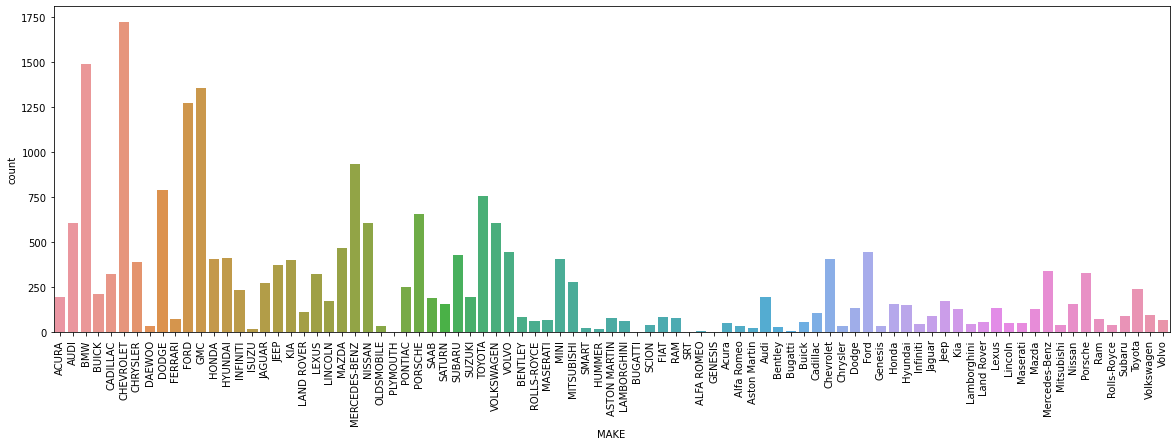

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='MAKE', data =df)
plt.xticks(rotation=90)

**Brand Marketshare**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

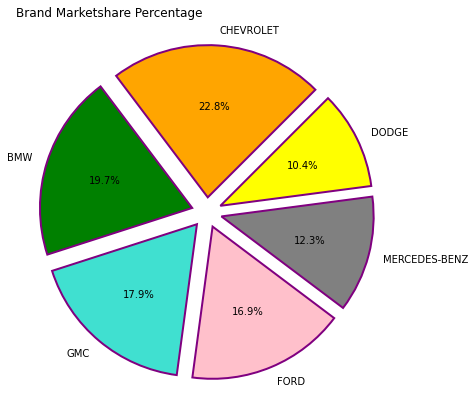

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("orange", "green", "turquoise", "pink","gray","yellow")
wp = {'linewidth':2, 'edgecolor':"purple"}
tags = df.MAKE.value_counts().head(6)
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=False, colors = colors, startangle=45,
          wedgeprops = wp, label='', explode = explode)
plt.title("Brand Marketshare Percentage", loc='left')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

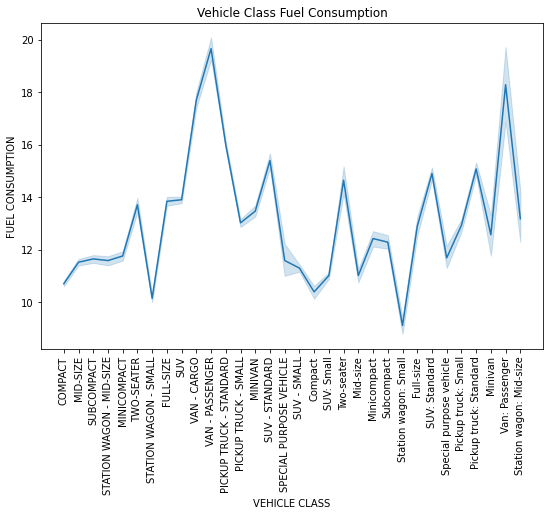

In [ ]:
plt.figure(figsize=(9,6))
plt.xlabel("VEHICLE CLASS")
plt.ylabel('FUEL CONSUMPTION')
plt.title("Vehicle Class Fuel Consumption")
sns.lineplot(x='VEHICLE CLASS',y='FUEL CONSUMPTION',data =df)
plt.xticks(rotation=90)

In [ ]:
Least_fuel_efficient_vehicle_class = df.groupby('VEHICLE CLASS')['FUEL CONSUMPTION'].mean().sort_values(ascending = False)

In [ ]:
Least_fuel_efficient_vehicle_class.head(6)

VEHICLE CLASS
VAN - PASSENGER            19.666202
Van: Passenger             18.291667
VAN - CARGO                17.704217
PICKUP TRUCK - STANDARD    15.997513
SUV - STANDARD             15.397665
Pickup truck: Standard     15.082136
Name: FUEL CONSUMPTION, dtype: float64

In [ ]:
Top_fuel_efficient_vehicle_class = df.groupby('VEHICLE CLASS')['FUEL CONSUMPTION'].mean().sort_values()
Top_fuel_efficient_vehicle_class.head(6)

VEHICLE CLASS
Station wagon: Small      9.113571
STATION WAGON - SMALL    10.152374
Compact                  10.395519
COMPACT                  10.705159
SUV: Small               11.017330
Mid-size                 11.017879
Name: FUEL CONSUMPTION, dtype: float64

**Influence of Engine Size On Fuel Consumption**


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.0, 1.0, 'Engine Size Fuel Consumption')

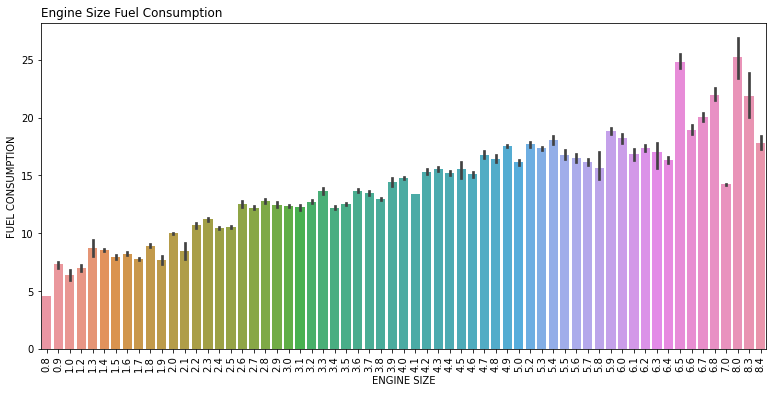

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(x="ENGINE SIZE", y = "FUEL CONSUMPTION", data = df)
plt.xticks(rotation=90)
plt.title("Engine Size Fuel Consumption", loc='left')

**Influence of Cylinders, MPG on Fuel Consumption**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

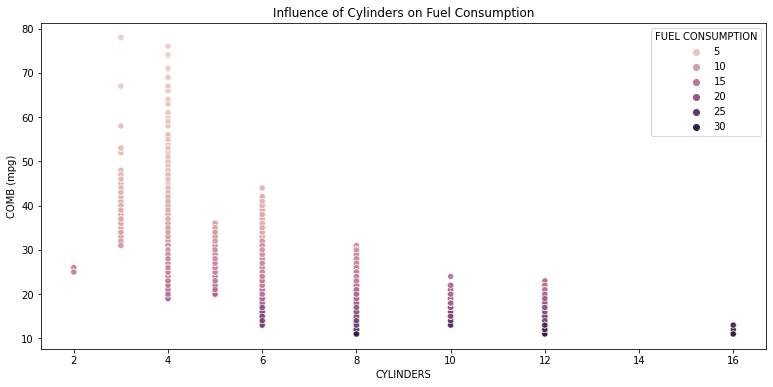

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Influence of Cylinders on Fuel Consumption")
sns.scatterplot(x='CYLINDERS', y='COMB (mpg)',hue='FUEL CONSUMPTION',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

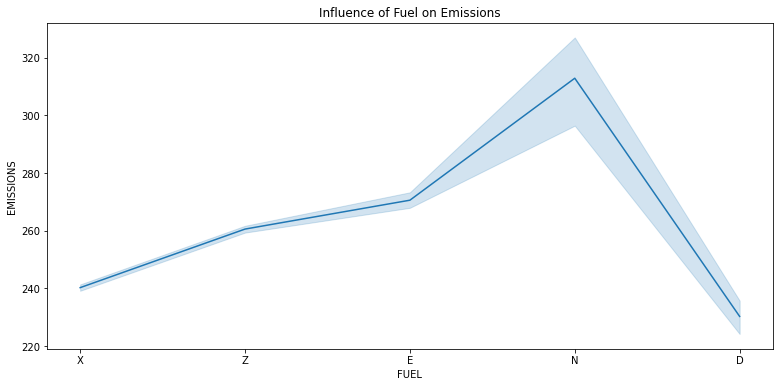

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Influence of Fuel on Emissions")
sns.lineplot(x='FUEL', y='EMISSIONS',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

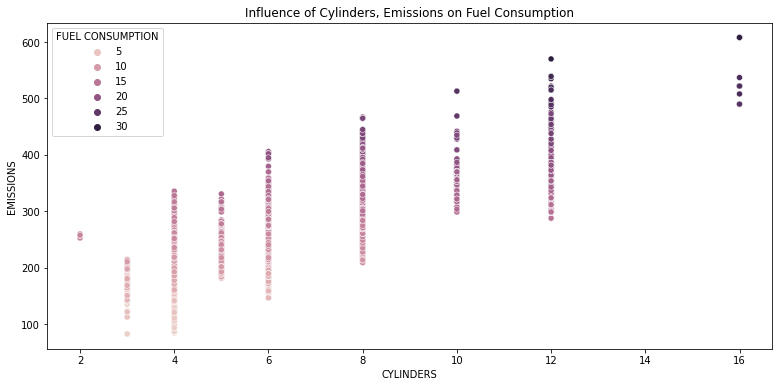

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Influence of Cylinders, Emissions on Fuel Consumption")
sns.scatterplot(x='CYLINDERS', y='EMISSIONS', hue='FUEL CONSUMPTION',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

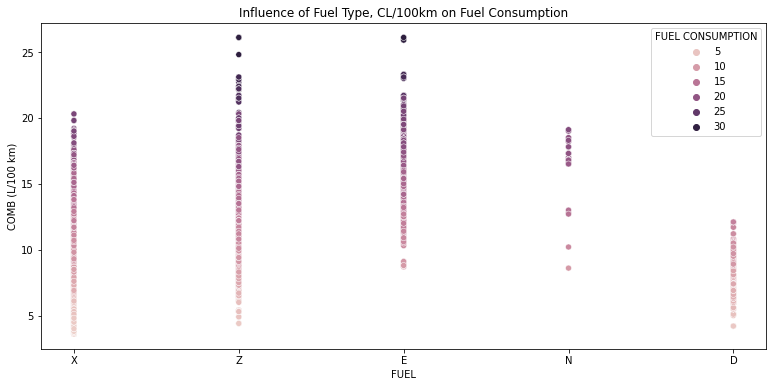

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Influence of Fuel Type, CL/100km on Fuel Consumption")
sns.scatterplot(x='FUEL', y='COMB (L/100 km)', hue='FUEL CONSUMPTION',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

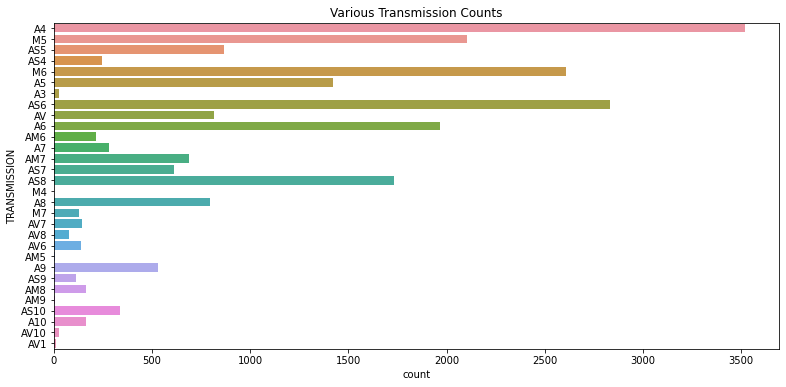

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Various Transmission Counts")
sns.countplot( y='TRANSMISSION',data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

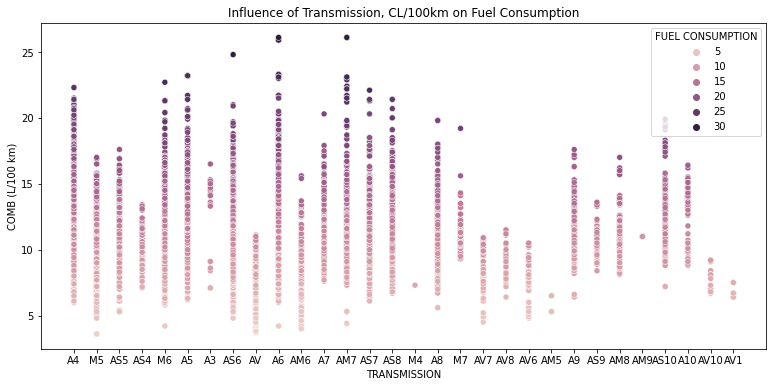

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Influence of Transmission, CL/100km on Fuel Consumption")
sns.scatterplot(x='TRANSMISSION', y='COMB (L/100 km)', hue='FUEL CONSUMPTION',data=df)
plt.show()

Correlation Between Variables

In [ ]:
df.corr()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
YEAR,1.000000,-0.077782,-0.072607,-0.098631,-0.007471,-0.068020,0.079989,-0.047869
ENGINE SIZE,-0.077782,1.000000,0.913377,0.821605,0.749394,0.807316,-0.755002,0.821285
CYLINDERS,-0.072607,0.913377,1.000000,0.794943,0.698344,0.771587,-0.714215,0.802176
FUEL CONSUMPTION,-0.098631,0.821605,0.794943,1.000000,0.942351,0.992960,-0.921361,0.919101
HWY (L/100 km),-0.007471,0.749394,0.698344,0.942351,1.000000,0.975014,-0.884744,0.894781
COMB (L/100 km),-0.068020,0.807316,0.771587,0.992960,0.975014,1.000000,-0.920915,0.922983
COMB (mpg),0.079989,-0.755002,-0.714215,-0.921361,-0.884744,-0.920915,1.000000,-0.901844
EMISSIONS,-0.047869,0.821285,0.802176,0.919101,0.894781,0.922983,-0.901844,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

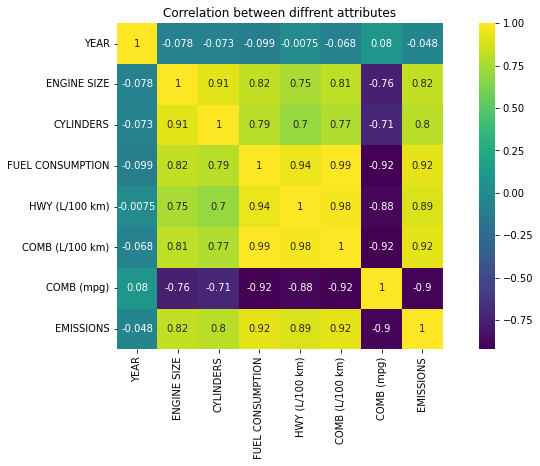

In [ ]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between diffrent attributes')
plt.show()

Model Building

In [ ]:
mod_df = df.drop(['YEAR',	'MAKE',	'MODEL',	'VEHICLE CLASS', 'TRANSMISSION'], axis=1)
mod_df.head(6)

,ENGINE SIZE,CYLINDERS,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,1.6,4,X,9.2,6.7,8.1,35,186
1,1.6,4,X,8.5,6.5,7.6,37,175
2,3.2,6,Z,12.2,7.4,10.0,28,230
3,3.5,6,Z,13.4,9.2,11.5,25,264
4,1.8,4,X,10.0,7.0,8.6,33,198
5,1.8,4,X,9.3,6.8,8.2,34,189


In [ ]:
mod_df.rename(columns={"FUEL CONSUMPTION": "FUEL_CONSUMPTION"}, inplace=True)
mod_df.head()

,ENGINE SIZE,CYLINDERS,FUEL,FUEL_CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,1.6,4,X,9.2,6.7,8.1,35,186
1,1.6,4,X,8.5,6.5,7.6,37,175
2,3.2,6,Z,12.2,7.4,10.0,28,230
3,3.5,6,Z,13.4,9.2,11.5,25,264
4,1.8,4,X,10.0,7.0,8.6,33,198


In [ ]:
mod_df.FUEL = mod_df.FUEL.replace({'X':1,'Z':2,'D':3, 'E':4,'N':5})

In [ ]:
mod_df.head()

,ENGINE SIZE,CYLINDERS,FUEL,FUEL_CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,1.6,4,1,9.2,6.7,8.1,35,186
1,1.6,4,1,8.5,6.5,7.6,37,175
2,3.2,6,2,12.2,7.4,10.0,28,230
3,3.5,6,2,13.4,9.2,11.5,25,264
4,1.8,4,1,10.0,7.0,8.6,33,198


mod_df

In [ ]:
x = mod_df.drop(['FUEL_CONSUMPTION'], axis=1)
y = mod_df.FUEL_CONSUMPTION

In [ ]:
x.head()

,ENGINE SIZE,CYLINDERS,FUEL,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,1.6,4,1,6.7,8.1,35,186
1,1.6,4,1,6.5,7.6,37,175
2,3.2,6,2,7.4,10.0,28,230
3,3.5,6,2,9.2,11.5,25,264
4,1.8,4,1,7.0,8.6,33,198


Splitting the DATA


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression(normalize=True)

In [ ]:
linReg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [ ]:
y_train

18581    18.4
16990     8.3
10068    11.6
10085    11.3
19136     9.1
         ... 
10955    12.4
17289    10.2
5192     13.7
12172     9.4
235      16.6
Name: FUEL_CONSUMPTION, Length: 15789, dtype: float64

In [ ]:
linReg_pred = linReg.predict(x_test)
linReg_pred

array([ 9.90416511, 13.05800182, 14.22406717, ...,  7.60183488,
       14.17913081, 12.49480286])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, linReg_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.005683436396503205


In [ ]:
linReg_accuracy = round(linReg.score(x_train, y_train))
linReg_accuracy

1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)
tree_pred

array([ 9.97954545, 13.31694915, 14.17      , ...,  7.40503145,
       14.03611111, 12.4952381 ])

In [ ]:
tree_accuracy = round(tree.score(x_train,y_train)*100)
tree_accuracy

99

In [ ]:
x_train

,ENGINE SIZE,CYLINDERS,FUEL,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
18581,5.7,8,1,13.8,16.4,17,384
16990,1.8,4,1,6.9,7.7,37,180
10068,3.0,6,2,7.8,9.9,29,228
10085,3.0,6,2,7.2,9.5,30,218
19136,2.0,4,1,7.1,8.2,34,193
...,...,...,...,...,...,...,...
10955,2.5,4,2,8.8,10.8,26,248
17289,1.5,3,2,7.8,9.1,31,213
5192,2.8,4,1,9.2,11.7,24,269
12172,2.0,4,2,6.9,8.3,34,191


In [ ]:
y_train

18581    18.4
16990     8.3
10068    11.6
10085    11.3
19136     9.1
         ... 
10955    12.4
17289    10.2
5192     13.7
12172     9.4
235      16.6
Name: FUEL_CONSUMPTION, Length: 15789, dtype: float64

In [ ]:
x_test

,ENGINE SIZE,CYLINDERS,FUEL,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
16458,2.0,4,1,7.0,8.6,33,201
16426,3.5,6,1,10.5,11.9,24,280
10262,5.3,8,1,9.5,12.1,23,278
2098,1.8,4,2,7.6,9.9,29,228
16349,5.7,8,1,10.9,13.6,21,319
...,...,...,...,...,...,...,...
22473,2.4,4,1,8.9,10.0,28,235
21639,3.0,6,2,10.5,11.7,24,273
10804,1.6,4,2,5.6,6.7,42,154
9176,7.0,8,2,8.2,11.5,25,264


In [ ]:
y_test

16458     9.8
16426    13.1
10262    14.2
2098     11.8
16349    15.8
         ... 
22473    10.9
21639    12.8
10804     7.7
9176     14.2
15809    12.6
Name: FUEL_CONSUMPTION, Length: 6767, dtype: float64